# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  
- What can be said about the three outliers in the upper left corner of the graph? 
- Is their first principal component score high or low?  
- What about their second principal component score?  
- What does that mean about their values in series_1, series_2, and series_3?  
- It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  

- How are series_1 and series_2 related, according to how they were created?  
- If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

Explained Varience Ratio: [0.79916477 0.18990532 0.01092991] 

Principle Components
     series_1  series_2  series_3
PC1  0.265415  0.300962  0.915957
PC2  0.603376  0.689142 -0.401275
PC3  0.751993 -0.659170 -0.001315


Text(0, 0.5, 'Second Principal Component Score')

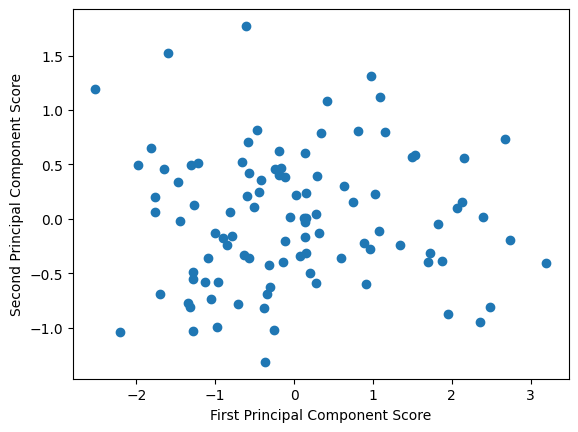

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df1 = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df1 - df1.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)

df_1 = pd.DataFrame(pca3.components_, columns=['series_1', 'series_2', 'series_3'], index=['PC1', 'PC2', 'PC3'])

print(f"Explained Varience Ratio: {pca3.explained_variance_ratio_} \n")

print(f"Principle Components")
print(df_1)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, 
            second_principal_component_score
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

#### **Answer**


**What can be said about the three outliers**

What is interesting about these outliers is that: 
 1. They have a strong negative relationship with the first PCA axis which means that they are going in the opposite direction of the main source of varience in the dataset. 
 2. They are really positive in the second PCA axis which means that they extend very far in the second most prominent direction of varience within the dataset. But their relative magnitude in this direction makes them an outlier here as well. 

**Is their first and second principle component high or low?**

So to reiterate, their first principal component score is really low (negative) and their second principle component is really large. 

**What does this mean about their values in series 1, 2, and 3?**

In terms of what these relative values in series 1, 2, and 3, PC1 is dominated by series 3 but weakly correlated with series 1 and 2 -- so a strongly negative score for these outliers in PC1 would mean that they likely have strong negative values in series 3. 

PC2 is somewhat correlated to series 1 and 2 equally, (with similar magnitudes being in the 0.6 - 0.7 range) so with the extremely strong value that these datapoints have in PC2, I would assume that they likely have stong positive values in both series 1 and series 2. 

Additionally, series 3 has a negative contribution to PC2, so a strongly positive PC2 score would likely mean that there is a lower value in series 3 -- this largely corroborates our intuitions about this relationship from PC1


**It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?**

Yes, underneath the explained varience ratio above, you can see the principle components and the individual contributions of each of the different series in each of those components. Modeled here as well: 

Principle Components:
     series_1  series_2  series_3
PC1  0.265415  0.300962  0.915957
PC2  0.603376  0.689142 -0.401275
PC3  0.751993 -0.659170 -0.001315

From this table, it’s clear that series_3 contributes very strongly to PC1, and also has a consistent negative loading on PC2. Since PC1 and PC2 together explain nearly 99% of the variance in the dataset, we can be confident that series_3 is strongly represented in the PCA plot, regardless of sign or direction.

In contrast, series_1 and series_2 have much smaller loadings in PC1, which explains about 80% of the variance, so their influence there is limited. They do contribute more significantly to PC2 (around 0.6–0.7), which captures about 19% of the variance. However, even then, their impact is not as dominant as series_3’s impact on PC1.

While PC3 shows stronger loadings for series_1 and series_2, it accounts for only ~1% of the total variance, meaning it doesn’t play a meaningful role in representing the data’s overall structure. Therefore, we shouldn’t expect series_1 and series_2 to stand out as clearly in the PCA plot as series_3.



**How are series_1 and series_2 related, according to how they were created?**

From the code of how series 1 and series 2 were created we can see: 

- series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
- series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))

So series 2 is essentially series 1 + noise. As they relate to PCA, this will essentially mean two things -- they'll be correlated, and they'll be going in the same direction, PCA wise. 

**If you like, try drawing a pairplot for all three series and see what you get.**

[plotted below]

**Overall, what are the advantages and disadvantages of the graph for part 1?  Does it show anything interesting?**


The advantage of the graph in Part 1 is that it shows the main directions of variance and highlights any outliers in the dataset — especially in this case, where Principal Components 1 and 2 together capture 99% of the total variance.
However, it also has some drawbacks. Plotting the principal components introduces a layer of abstraction away from the original variables. As we saw with series_1 and series_2, it can be difficult to reconstruct or interpret their original relationships just by looking at the PCA plot.


In [46]:
df1

,ser1,ser2,ser3
0,2.882026,3.424755,2.350030
1,2.200079,1.903561,1.936752
2,2.489369,2.173098,3.858098
3,3.120447,3.422942,4.142804
4,2.933779,2.589611,3.872781
...,...,...,...
95,2.353287,2.312917,3.691002
96,2.005250,2.160013,2.103232
97,2.892935,3.131170,3.736159
98,2.063456,2.509830,1.651333


Text(0, 0.5, 'Third Principal Component Score')

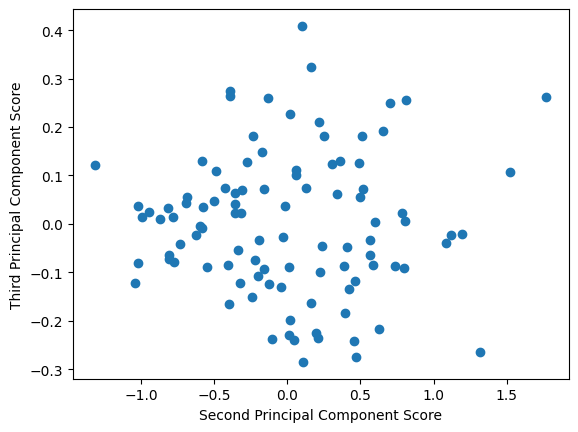

In [47]:
first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
third_principal_component_score = df.dot(pca3.components_[2])


plt.scatter(second_principal_component_score, 
            third_principal_component_score
            )
plt.xlabel("Second Principal Component Score")
plt.ylabel("Third Principal Component Score")

Text(0, 0.5, 'Third Principal Component Score')

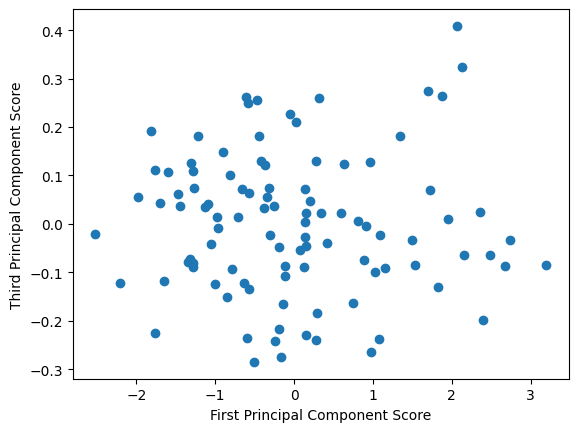

In [48]:
first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
third_principal_component_score = df.dot(pca3.components_[2])


plt.scatter(first_principal_component_score, 
            third_principal_component_score
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Third Principal Component Score")

___

# 3. Working on your datasets

#### **This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.**

Here are some types of analysis you can do:

- Draw heatmaps.
- Draw bubble plots.
- Perform Principal Component Analysis to find out the directions in which the data varies.  
- Try performing linear regression analysis using different sets of features.
  - Try using your correlation information from previous weeks to help choose features for linear regression.





____

## **Pre-Plot Processing**

Import the datasets

In [49]:
fnfallplays = pd.read_csv("/Users/leemcfarling/Desktop/FNF_All_Plays.csv")
fnfallplays

,PlayKey,BodyPart,Surface,InjuryLength,PlayerKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,...,PlayerGamePlay,Position,PositionGroup,x,y,direction,speed,distance,time,Inj_Occured
0,26624-1-1,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,1,QB,QuarterBack,87.665753,28.221104,186.148361,0.535753,0.056288,14.90,0
1,26624-1-2,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,2,QB,QuarterBack,86.616462,29.144077,211.949423,0.849692,0.090077,12.95,0
2,26624-1-3,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,3,QB,QuarterBack,79.677264,28.900203,194.134122,0.331014,0.036081,14.75,0
3,26624-1-4,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,4,QB,QuarterBack,72.469449,26.680157,163.762205,0.523701,0.054016,6.30,0
4,26624-1-5,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,5,QB,QuarterBack,65.407846,24.865577,222.120577,0.970385,0.099769,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,47888-13-51,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,51,DB,DefensiveBack,41.700296,18.853989,155.077709,1.229191,0.124582,18.50,0
267002,47888-13-52,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,52,DB,DefensiveBack,53.980678,18.102780,169.963559,1.796203,0.180780,14.70,0
267003,47888-13-53,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,53,DB,DefensiveBack,57.170638,10.130479,181.141330,1.806649,0.182394,9.35,0
267004,47888-13-54,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,54,DB,DefensiveBack,54.662095,18.973687,166.529609,2.147682,0.215279,17.85,0


Injury Length is a Categorical Variable at the moment -- let's map this to an ordinal categorical variable with the Injury Length being the minimum amount of days an athlete was out for:

In [65]:
# ==========================================
# Remap Injury Length to ordinal Categories
# ------------------------------------------
# if injury == 1+ days then 1, 
# if injury == 42+ days then 42, etc. 
# if NO injury then 0 
# ==========================================

injury_mapping =  {"1+": 1, "7+" : 7, "28+": 28, "42+": 42}
fnfallplays['InjuryLength'] = fnfallplays['InjuryLength'].map(injury_mapping).fillna(0).astype(int)

And now let's do some dataframe filtering: 
- Separate out 'injury' from 'non-injury' plays (injuries are an outlier)
- Serparate out the 'categorical' from 'numeric' datatypes. 

In [70]:
df_numeric

,InjuryLength,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,x,y,direction,speed,distance,time,Inj_Occured
0,0,26624,1,1,63,1,87.665753,28.221104,186.148361,0.535753,0.056288,14.90,0
1,0,26624,1,1,63,2,86.616462,29.144077,211.949423,0.849692,0.090077,12.95,0
2,0,26624,1,1,63,3,79.677264,28.900203,194.134122,0.331014,0.036081,14.75,0
3,0,26624,1,1,63,4,72.469449,26.680157,163.762205,0.523701,0.054016,6.30,0
4,0,26624,1,1,63,5,65.407846,24.865577,222.120577,0.970385,0.099769,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,0,47888,99,13,33,51,41.700296,18.853989,155.077709,1.229191,0.124582,18.50,0
267002,0,47888,99,13,33,52,53.980678,18.102780,169.963559,1.796203,0.180780,14.70,0
267003,0,47888,99,13,33,53,57.170638,10.130479,181.141330,1.806649,0.182394,9.35,0
267004,0,47888,99,13,33,54,54.662095,18.973687,166.529609,2.147682,0.215279,17.85,0


In [ ]:
# Numeric Columns
numeric_cols = fnfallplays.select_dtypes(include='number').columns
filtered_cols = [col for col in numeric_cols if 'id' not in col.lower()] # Filter OUT 'id' columns
df_numeric = fnfallplays[filtered_cols]

# Injury Plays Numeric
injury_plays_numeric = df_numeric[df_numeric['Inj_Occured'] == 1]

# Categorical columns
df_categorical_cols = fnfallplays.select_dtypes(exclude=['number']).columns
cat_id_cols = [col for col in fnfallplays.columns if 'id' in col.lower()] #.lower() to avoid any capitalization issues
combined_cat_cols = list(df_categorical_cols) + cat_id_cols
df_categorical = fnfallplays[combined_cat_cols]



## **Bubble Plots**

First, let's make a function to call to create the bubble plots so we're not re-writing the same stuff over and over. We want the parameters to be - input dataframe, x, y, size_col

In [69]:
def bubble_plot(data, x, y, size_col, maxbubble=300):
    """
    Parameters:
    - data: Input dataFrame
    - x: string name of column for x-axis
    - y: string name of column for y-axis
    - size_col: string name of column for bubble size
    - maxbubble: int, maximum bubble size (default 300)
    """
    size_data = data[size_col]
    min_size = size_data.min()
    max_size = size_data.max()
    epsilon = 1e-6  # avoid div-by-zero

    # Handle edge cases in sizing
    if pd.isna(min_size) or pd.isna(max_size) or max_size == 0:
        size_range = (10, maxbubble)
    else:
        size_range = (max(epsilon, min_size / (max_size + epsilon) * maxbubble), maxbubble)

    # Create new plot if ax is not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        size=size_col,
        sizes=size_range,
        legend=True,
        alpha=0.7,
        ax=ax
    )
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{y} vs {x} (Bubble size = {size_col})")
    return ax

And now let's investigate a few numeric features as they relate to injury length

**First, positioning on the field in terms of X and Y**

<Axes: title={'center': 'y vs x (Bubble size = InjuryLength)'}, xlabel='x', ylabel='y'>

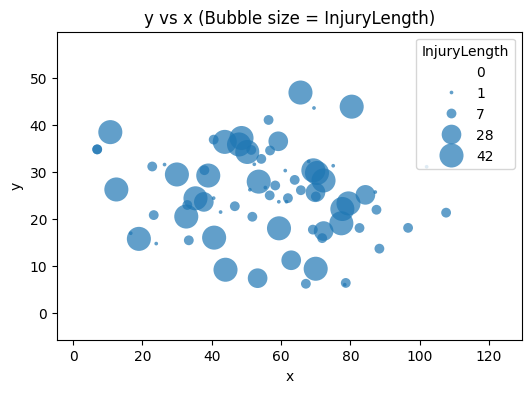

In [63]:
bubble_plot(
    data=df_numeric,
    x='x',
    y='y',
    size_col='InjuryLength'
            )

In [71]:
bubble_plot(
    data=df_numeric,
    x='PlayerDay',
    y='PlayerGame',
    size_col='InjuryLength'
            )

UnboundLocalError: cannot access local variable 'ax' where it is not associated with a value

#### **Discussion**
- PCA: Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  
- PCA: How much of the variance would this capture?
- Lin Reg: Which features seem most likely to be useful to predict other features?
    - Explain what conclusions you would draw from this analysis: are the data what you expect? 
    - Are the data likely to be usable? If the data are not useable, find some new data!
- Do you see any outliers? (Data points that are far from the rest of the data).
- Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

___

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.